<a href="https://colab.research.google.com/github/Sigerip/curso-data-viz/blob/main/Demograficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Demográficos com Seaborn

Neste capítulo, aplicaremos os conhecimentos adquiridos sobre visualização de dados com Seaborn para analisar dados demográficos, com foco em tábuas de mortalidade, expectativa de vida e mortalidade infantil. Esses tipos de dados são fundamentais para compreender a dinâmica populacional e para o planejamento de políticas públicas.

## Introdução aos Dados Demográficos  

Dados demográficos são estatísticas que descrevem características de uma população, como idade, sexo, mortalidade, natalidade, migração, entre outros. Neste capítulo, focaremos em três aspectos importantes:  
  
1. **Tábuas de Mortalidade**: Tabelas que mostram a probabilidade de morte em diferentes idades  
2. **Expectativa de Vida**: Estimativa do número médio de anos que uma pessoa viverá  
3. **Mortalidade Infantil**: Taxa de mortes de crianças menores de um ano  
  
Vamos começar importando as bibliotecas necessárias e configurando o ambiente:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Configurar o estilo
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

## Análise de Tábuas de Mortalidade

As tábuas de mortalidade são ferramentas fundamentais em demografia e atuária. Elas mostram a probabilidade de morte em cada idade e são usadas para calcular a expectativa de vida e para precificar seguros de vida e planos de previdência.

In [2]:
# Careegar Tábuas do Github em formato Parquet
tabua_mas = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/tabua_homens.parquet")
tabua_fem = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/tabua_mulheres.parquet")

# Visualizar primeiras linhas da tábua masculina
print("Tábuas de Mortalidade - Homens")
tabua_mas.head(20)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [ ]:
# Visualizar primeiras linhas da tábua feminina
print("Tábua de Mortalidade - Mulheres")
tabua_fem.head(20)

Tábua de Mortalidade - Mulheres


,Ano,Grupo Etário,nMx,nqx,nAx,lx,ndx,nLx,Tx,ex,Local
0,2000,0,0.024971,0.024436,0.123308,100000.000000,2443.606753,97857.710004,7.507655e+06,75.076554,Brasil
1,2000,1-4,0.001049,0.004185,1.484223,97556.393247,408.240564,389198.530691,7.409798e+06,75.953993,Brasil
2,2000,5-9,0.000310,0.001548,2.250412,97148.152683,150.379710,485327.281146,7.020599e+06,72.266934,Brasil
3,2000,10-14,0.000337,0.001684,2.633627,96997.772973,163.353610,484602.309253,6.535272e+06,67.375483,Brasil
4,2000,15-19,0.000590,0.002948,2.662049,96834.419362,285.482396,483504.653053,6.050670e+06,62.484699,Brasil
5,2000,20-24,0.000738,0.003684,2.593931,96548.936967,355.684265,481888.883943,5.567165e+06,57.661586,Brasil
6,2000,25-29,0.000934,0.004658,2.612628,96193.252702,448.065653,479896.564096,5.085276e+06,52.865205,Brasil
7,2000,30-34,0.001279,0.006377,2.634695,95745.187049,610.566862,477281.758292,4.605379e+06,48.100375,Brasil
8,2000,35-39,0.001805,0.008988,2.651480,95134.620187,855.081803,473664.924060,4.128098e+06,43.392171,Brasil
9,2000,40-44,0.002695,0.013391,2.659413,94279.538384,1262.501249,468442.697466,3.654433e+06,38.761674,Brasil


## Visualização da Probabilidade de Morte (qx)

Vamos visualizar como a probabilidade de morte varia com a idade:

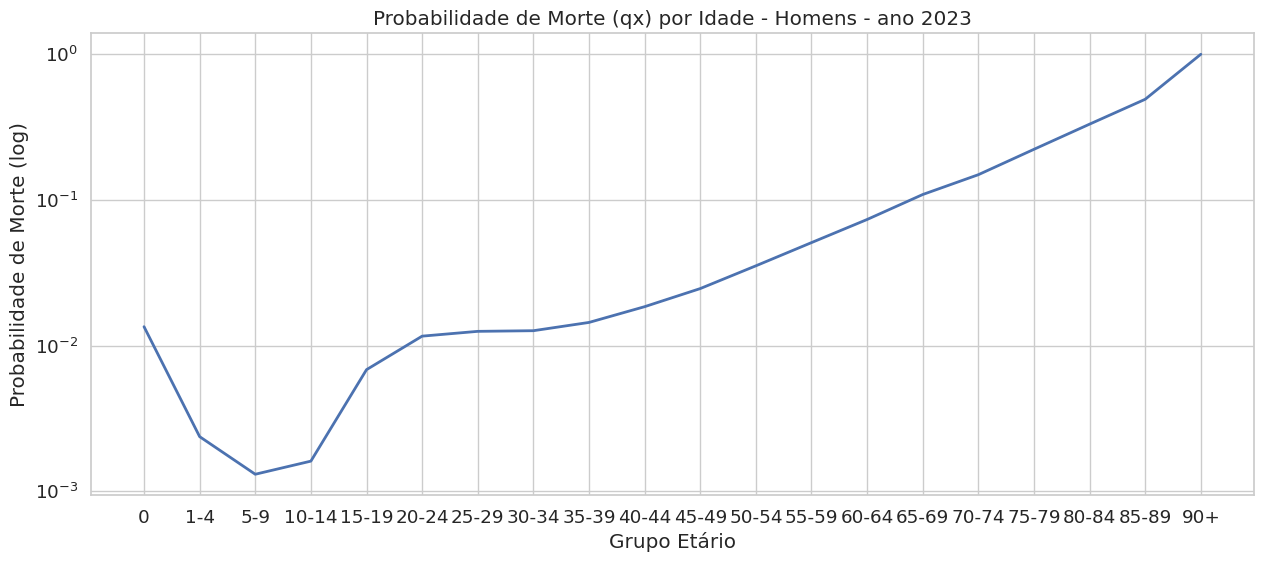

In [ ]:
# Filtrar apenas o ano de 2023 para a tábua de mortalidade masculina
tabua_mas_2023 = tabua_mas[tabua_mas['Ano'] == 2023]

# Filtrar apenas o Local Brasil
tabua_mas_2023_br = tabua_mas_2023[tabua_mas_2023['Local'] == 'Brasil']

# Gerar o gráfico
plt.figure(figsize=(15, 6))
sns.lineplot(x='Grupo Etário', y='nqx', data=tabua_mas_2023_br, linewidth=2)
plt.title('Probabilidade de Morte (qx) por Idade - Homens - ano 2023')
plt.xlabel('Grupo Etário')
plt.ylabel('Probabilidade de Morte (log)')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True, which="major", ls="-")
plt.show()

## Comparação de Tábuas de Mortalidade por Sexo

Na prática, as tábuas de mortalidade são diferentes para homens e mulheres. Vamos observar a diferença do comportamento da probabilidade de morte (qx):

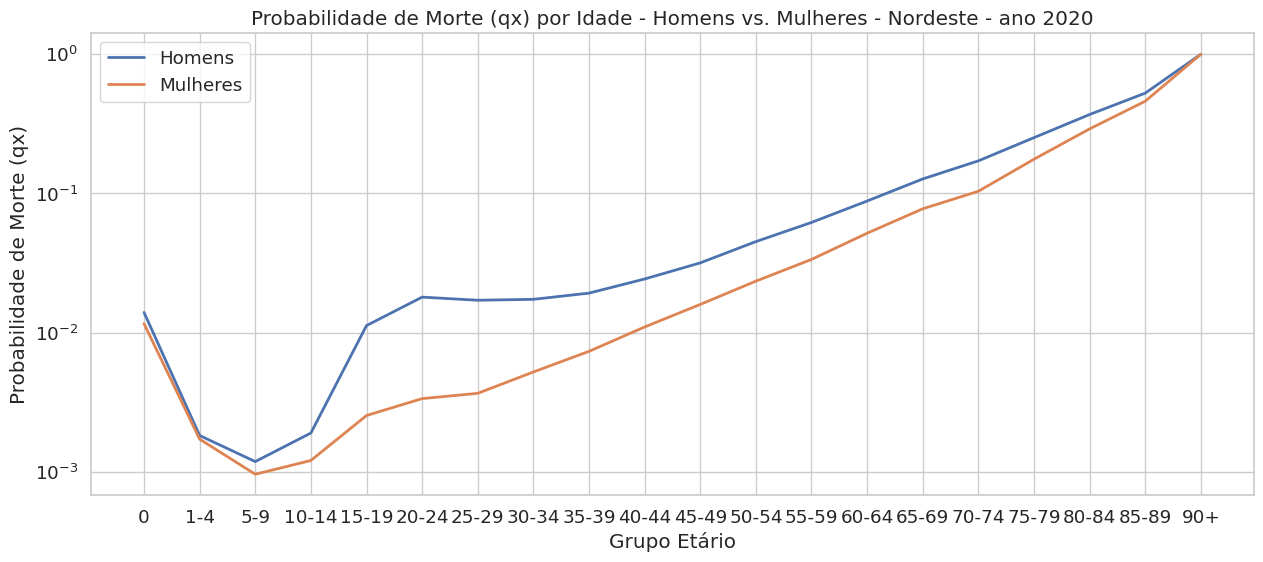

In [ ]:
# Filtrar apenas o ano de 2020 para ambas as tábuas
tabua_mas_2020 = tabua_mas[tabua_mas['Ano'] == 2020]
tabua_fem_2020 = tabua_fem[tabua_fem['Ano'] == 2020]

# Filtrar apenas o Local Nordeste para asmbas as tábuas
tabua_mas_2020_ne = tabua_mas_2020[tabua_mas_2020['Local'] == 'Nordeste']
tabua_fem_2020_ne = tabua_fem_2020[tabua_fem_2020['Local'] == 'Nordeste']

# Gerar um gráfico com as duas linhas de probabilidade de morte por grupo etário
plt.figure(figsize=(15, 6))
sns.lineplot(x='Grupo Etário', y='nqx', data=tabua_mas_2020_ne, linewidth=2, label='Homens')
sns.lineplot(x='Grupo Etário', y='nqx', data=tabua_fem_2020_ne, linewidth=2, label='Mulheres')
plt.title('Probabilidade de Morte (qx) por Idade - Homens vs. Mulheres - Nordeste - ano 2020')
plt.xlabel('Grupo Etário')
plt.ylabel('Probabilidade de Morte (qx)')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True, which="major", ls="-")
plt.legend()
plt.show()

# Evolução do Comportamento da Probabilidade de Morte

Com dados históricos das tábuas de mortalidade, podemos observar a evolução do comportamento da probabilidade de morte (qx) com o passar dos anos.

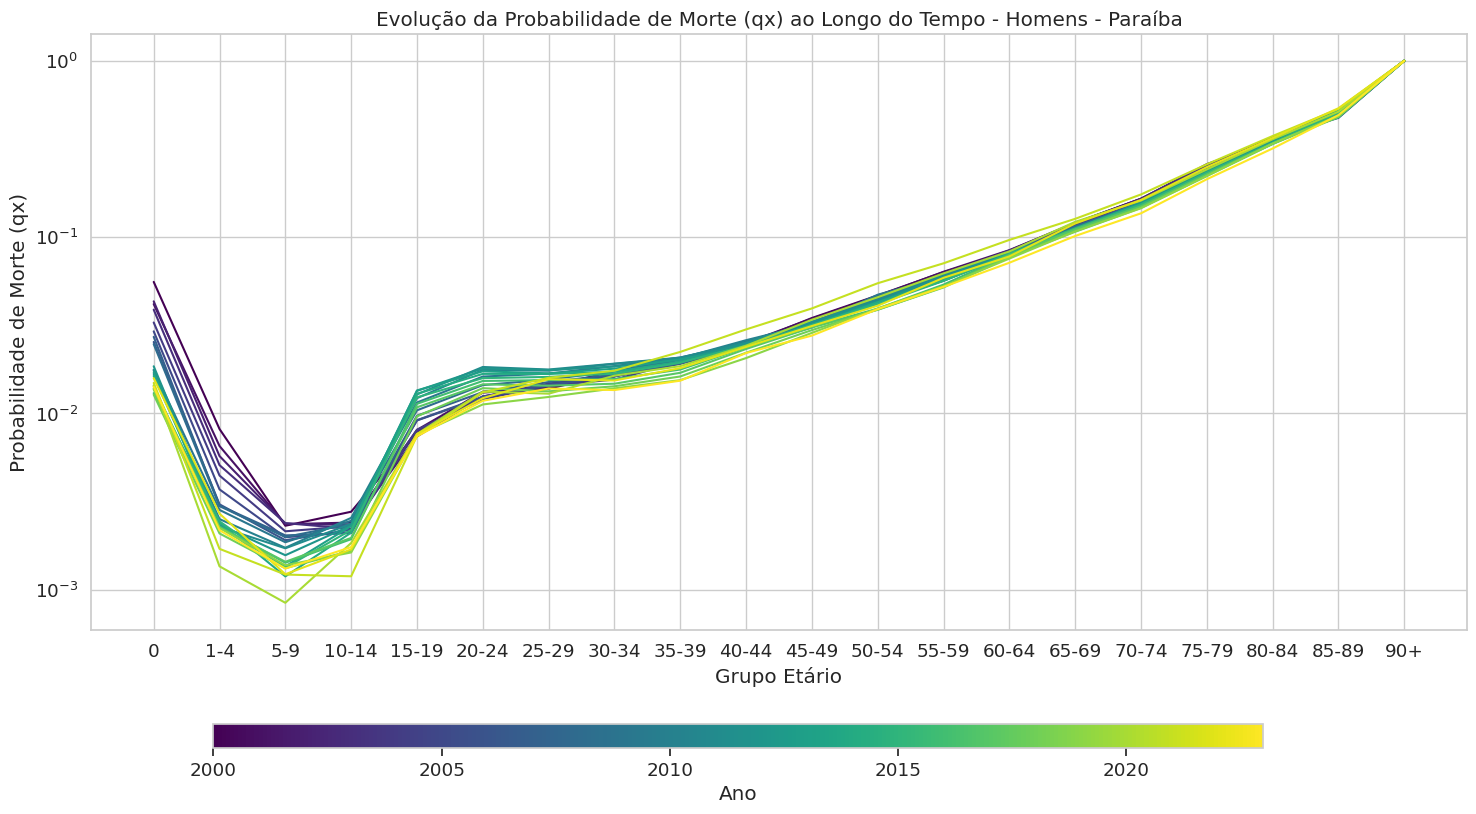

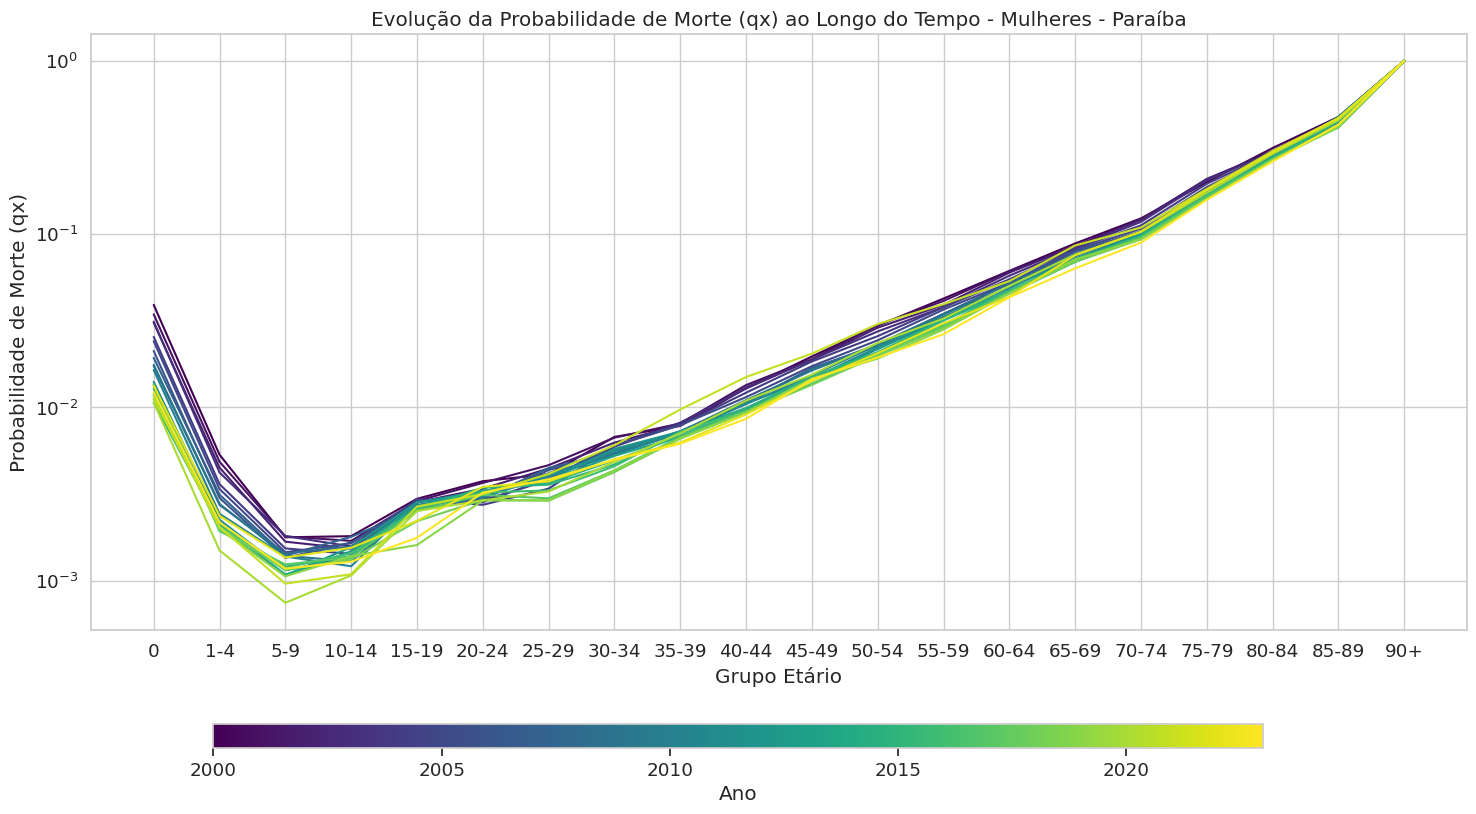

In [ ]:
# Função para gerar o gráfico
def plot_qx_evolution(data, title):
    plt.figure(figsize=(15, 8))

    anos = sorted(data['Ano'].unique())
    colors = plt.cm.viridis(np.linspace(0, 1, len(anos)))

    for ano, color in zip(anos, colors):
        dados_ano = data[data['Ano'] == ano]
        sns.lineplot(x='Grupo Etário', y='nqx', data=dados_ano,
                     color=color, label='_nolegend_', linewidth=1.5)

    plt.title(title)
    plt.xlabel('Grupo Etário')
    plt.ylabel('Probabilidade de Morte (qx)')
    plt.yscale('log')
    plt.grid(True, which="major", ls="-")

    norm = mcolors.Normalize(vmin=min(anos), vmax=max(anos))
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Deixa espaço abaixo

    # Barra de cores horizontal
    cbar_ax = plt.gcf().add_axes([0.15, 0.05, 0.7, 0.03])  # [left, bottom, width, height]
    cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Ano')

    plt.show()

# Filtrar apenas o Local Paraíba para ambas as tábuas
tabua_mas_pb = tabua_mas[tabua_mas['Local'] == 'Paraíba']
tabua_fem_pb = tabua_fem[tabua_fem['Local'] == 'Paraíba']

# Gerar os gráficos
plot_qx_evolution(tabua_mas_pb, 'Evolução da Probabilidade de Morte (qx) ao Longo do Tempo - Homens - Paraíba')
plot_qx_evolution(tabua_fem_pb, 'Evolução da Probabilidade de Morte (qx) ao Longo do Tempo - Mulheres - Paraíba')

## Análise de Expectativa de Vida

A expectativa de vida é uma medida estatística que indica o número médio de anos que uma pessoa viverá a partir de uma determinada idade. Vamos visualizar a expectativa de vida em diferentes idades:

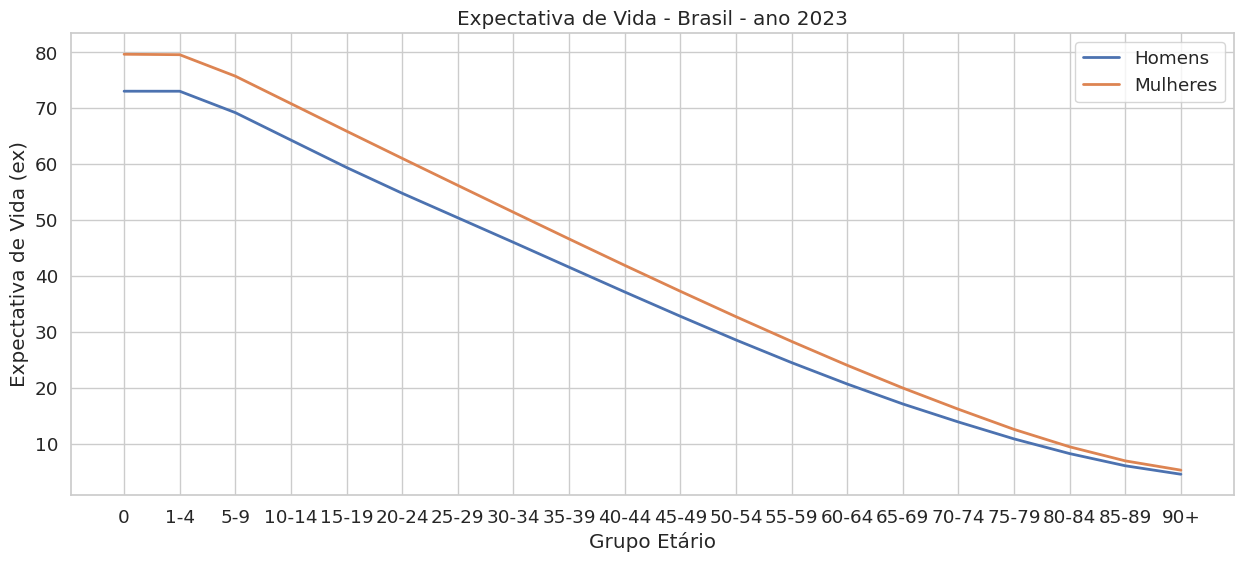

In [ ]:
# Filtrar apenas o Local Brasil para ambas as tábuas
tabua_mas_br = tabua_mas[tabua_mas['Local'] == 'Brasil']
tabua_fem_br = tabua_fem[tabua_fem['Local'] == 'Brasil']

# Gráfico da Expectativa de Vida para os dois sexos no ano de 2023
plt.figure(figsize=(15, 6))
sns.lineplot(x='Grupo Etário', y='ex', data=tabua_mas_br[tabua_mas_br['Ano'] == 2023], linewidth=2, label='Homens')
sns.lineplot(x='Grupo Etário', y='ex', data=tabua_fem_br[tabua_fem_br['Ano'] == 2023], linewidth=2, label='Mulheres')
plt.title('Expectativa de Vida - Brasil - ano 2023')
plt.xlabel('Grupo Etário')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")
plt.show()

## Evolução da Expectativa de Vida ao Longo do Tempo

A expectativa de vida tem aumentado ao longo do tempo devido a melhorias na saúde pública, nutrição, medicina, entre outros fatores. Vamos visualizar essa evolução:

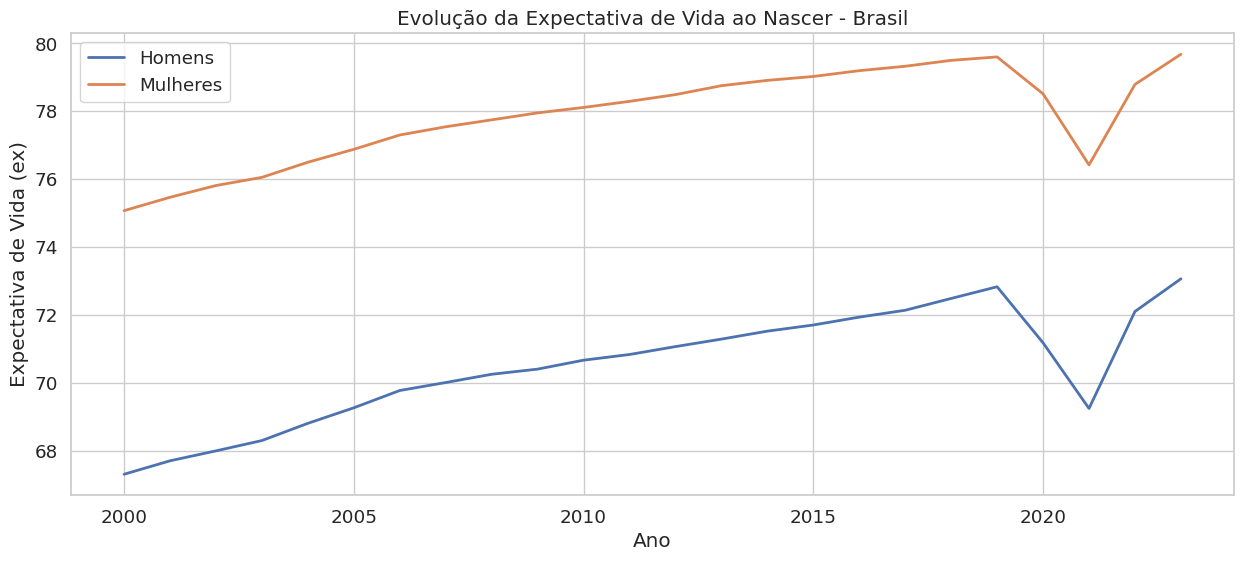

In [ ]:
# Filtrar apenas o Local Brasil para ambas as tábuas
tabua_mas_br = tabua_mas[tabua_mas['Local'] == 'Brasil']
tabua_fem_br = tabua_fem[tabua_fem['Local'] == 'Brasil']

# Filtrar apenas o Grupo Etário 0 para ambas as tábuas
tabua_mas_br_0 = tabua_mas_br[tabua_mas_br['Grupo Etário'] == '0']
tabua_fem_br_0 = tabua_fem_br[tabua_fem_br['Grupo Etário'] == '0']

# Gráfico da Evolução da Expectativa de Vida ao Nascer para Homens e Mulheres
plt.figure(figsize=(15, 6))
sns.lineplot(x='Ano', y='ex', data=tabua_mas_br_0, linewidth=2, label='Homens')
sns.lineplot(x='Ano', y='ex', data=tabua_fem_br_0, linewidth=2, label='Mulheres')
plt.title('Evolução da Expectativa de Vida ao Nascer - Brasil')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")
plt.show()

## Comparação da Expectativa de Vida entre Regiões

A expectativa de vida varia significativamente entre países, regiões e estados devido a diferenças socioeconômicas, sistemas de saúde, entre outros fatores.

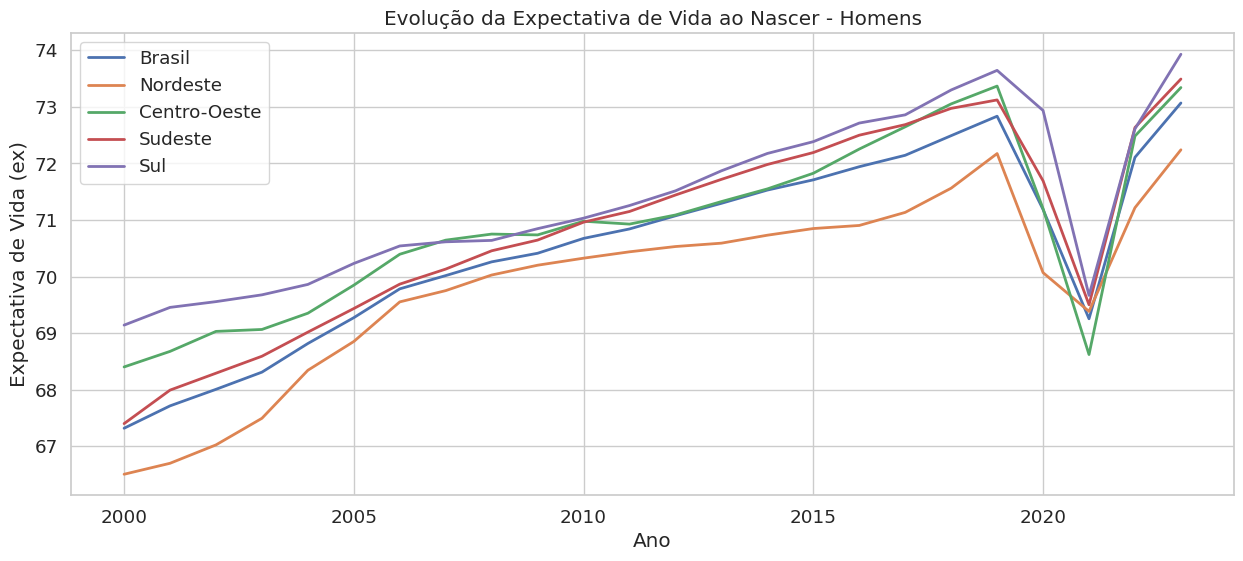

In [ ]:
# Filtrar as regiões para a tábua masculina
tabua_mas_reg = tabua_mas[tabua_mas['Local'].isin(['Brasil', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])]

# Isolar a tábua de cada região
tabua_mas_br = tabua_mas_reg[tabua_mas_reg['Local'] == 'Brasil']
tabua_mas_ne = tabua_mas_reg[tabua_mas_reg['Local'] == 'Nordeste']
tabua_mas_no = tabua_mas_reg[tabua_mas_reg['Local'] == 'Centro-Oeste']
tabua_mas_se = tabua_mas_reg[tabua_mas_reg['Local'] == 'Sudeste']
tabua_mas_su = tabua_mas_reg[tabua_mas_reg['Local'] == 'Sul']

# Filtrar o Grupo Etário 0 para todas as tábuas
tabua_mas_br_0 = tabua_mas_br[tabua_mas_br['Grupo Etário'] == '0']
tabua_mas_ne_0 = tabua_mas_ne[tabua_mas_ne['Grupo Etário'] == '0']
tabua_mas_no_0 = tabua_mas_no[tabua_mas_no['Grupo Etário'] == '0']
tabua_mas_se_0 = tabua_mas_se[tabua_mas_se['Grupo Etário'] == '0']
tabua_mas_su_0 = tabua_mas_su[tabua_mas_su['Grupo Etário'] == '0']

# Gráfico da Evolução da Expectativa de Vida ao Nascer de Homens por Região
plt.figure(figsize=(15, 6))
sns.lineplot(x='Ano', y='ex', data=tabua_mas_br_0, linewidth=2, label='Brasil')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_ne_0, linewidth=2, label='Nordeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_no_0, linewidth=2, label='Centro-Oeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_se_0, linewidth=2, label='Sudeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_su_0, linewidth=2, label='Sul')
plt.title('Evolução da Expectativa de Vida ao Nascer - Homens')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")
plt.legend()
plt.show()

## Análise de Mortalidade Infantil

A mortalidade infantil é um indicador importante da saúde pública e do desenvolvimento socioeconômico de um país.

## Comparação da Mortalidade Infatil entre Regiões

A mortalidade infantil varia significativamente entre diferentes regiões e países. Vamos visualizar essas diferenças:

## Relação entre Mortalidade Infantil e Outros Indicadores

A mortalidade infantil está frequentemente relacionada a outros indicadores socioeconômicos. Vamos visualizar essas relações:

## Conclusão

Neste capítulo, exploramos como o Seaborn pode ser usado para analisar e visualizar dados demográficos, com foco em tábuas de mortalidade, expectativa de vida e mortalidade infantil. Essas visualizações são fundamentais para compreender a dinâmica populacional e para o planejamento de políticas públicas.

No próximo capítulo, apresentaremos exercícios práticos para consolidar os conhecimentos adquiridos ao longo do curso.